<a href="https://colab.research.google.com/github/alarcon7a/DataScience/blob/master/OpenAI_GPT_Tune.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instalar las librerias necesarias

In [ ]:
!pip install --upgrade openai
!pip install jsonlines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 KB 4.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.5/147.5 KB 15.0 MB/s eta 0:00:00
  Created wheel for openai: filename=openai-0.25.0-py3-none-any.whl size=55880 sha256=6c3a96434a5c1cb34326b9cadf84302553c0039bfa664396427ade19bb4b841a
  Stored in directory: /root/.cache/pip/wheels/4b/92/33/6f57c7aae0b16875267999a50570e81f15eecec577ebe05a2e
Successfully built openai
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Cargar el api key

In [ ]:
import os
import openai

# Carga del API key de OpenAI.
openai.api_key = open('/content/key_open_ai.txt').read()

os.environ['OPENAI_API_KEY'] = open('/content/key_open_ai.txt').read()

## Llevar el archivo plano txt a un formato jsonl

In [ ]:
import jsonlines

script = open('/content/Freddy.txt').read()

script_lines = script.split('\n')

# Lectura del archivo .docx y formateo a documento .jsonl
with jsonlines.open('training.jsonl', mode='w') as writer:

  for i, text in enumerate(script_lines):

    if len(text) > 0:
      for line in text.split('.'):
        if len(line) > 0:
          if line[0] == " ":
            line = line[1:]
          writer.write({"prompt":"", "completion": ' ' + line })


## Instalar tool de open AI para fine tune

In [ ]:
!openai tools fine_tunes.prepare_data -f training.jsonl -q

Analyzing...

- Your file contains 878 prompt-completion pairs
- There are 14 duplicated prompt-completion sets. These are rows: [40, 234, 239, 311, 323, 357, 440, 448, 464, 489, 534, 597, 790, 794]

Based on the analysis we will perform the following actions:
- [Recommended] Remove 14 duplicate rows [Y/n]: Y


Your data will be written to a new JSONL file. Proceed [Y/n]: Y

Wrote modified file to `training_prepared.jsonl`
Feel free to take a look!

Now use that file when fine-tuning:
> openai api fine_tunes.create -t "training_prepared.jsonl"


Once your model starts training, it'll approximately take 48.51 minutes to train a `curie` model, and less for `ada` and `babbage`. Queue will approximately take half an hour per job ahead of you.


## Empieza el entrenamiento

### Para este caso lo entreno por 5 epocas, que es la cantidad de iteraciones y con el modelo davinci, podria usar cualquier otro modelo.

In [ ]:
!openai api fine_tunes.create -t "training_prepared.jsonl" -m davinci --n_epochs=5 --suffix "FreddyTalk"

Upload progress: 100% 62.1k/62.1k [00:00<00:00, 86.5Mit/s]
Uploaded file from training_prepared.jsonl: file-zheOU24t3Z22IlOeZTvqo77Z
Created fine-tune: ft-0bZRmHmuxKULhCkkWnf0EcZ5
Streaming events until fine-tuning is complete...

(Ctrl-C will interrupt the stream, but not cancel the fine-tune)
[2023-01-04 15:09:26] Created fine-tune: ft-0bZRmHmuxKULhCkkWnf0EcZ5
[2023-01-04 15:10:16] Fine-tune costs $1.86
[2023-01-04 15:10:16] Fine-tune enqueued. Queue number: 0
[2023-01-04 15:14:42] Fine-tune started

Stream interrupted (client disconnected).
To resume the stream, run:

  openai api fine_tunes.follow -i ft-0bZRmHmuxKULhCkkWnf0EcZ5



## Copiar la linea de arriba para terminar el entrenanmiento

In [ ]:
!openai api fine_tunes.follow -i ft-0bZRmHmuxKULhCkkWnf0EcZ5

[2023-01-04 15:09:26] Created fine-tune: ft-0bZRmHmuxKULhCkkWnf0EcZ5
[2023-01-04 15:10:16] Fine-tune costs $1.86
[2023-01-04 15:10:16] Fine-tune enqueued. Queue number: 0
[2023-01-04 15:14:42] Fine-tune started
[2023-01-04 15:20:12] Completed epoch 1/5
[2023-01-04 15:24:19] Completed epoch 2/5
[2023-01-04 15:28:25] Completed epoch 3/5
[2023-01-04 15:32:32] Completed epoch 4/5
[2023-01-04 15:36:40] Completed epoch 5/5
[2023-01-04 15:37:15] Uploaded model: davinci:ft-platzi-inc:freddytalk-2023-01-04-15-37-15
[2023-01-04 15:37:19] Uploaded result file: file-U5eiRlD6oJ51U4gYG8VLMyDM
[2023-01-04 15:37:19] Fine-tune succeeded

Job complete! Status: succeeded 🎉
Try out your fine-tuned model:

openai api completions.create -m davinci:ft-platzi-inc:freddytalk-2023-01-04-15-37-15 -p <YOUR_PROMPT>


## El resultado es:

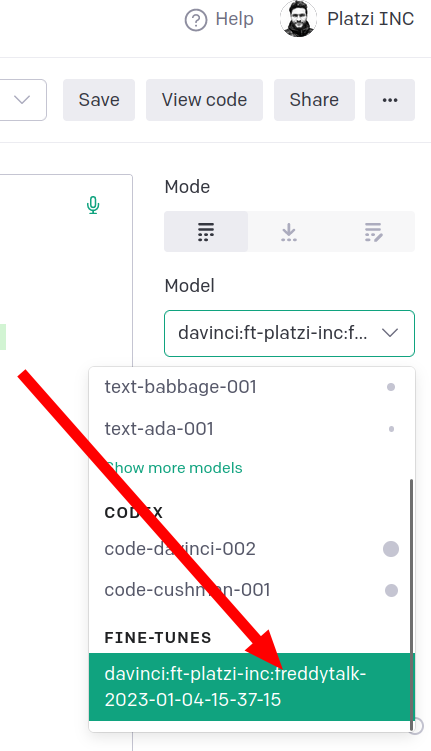

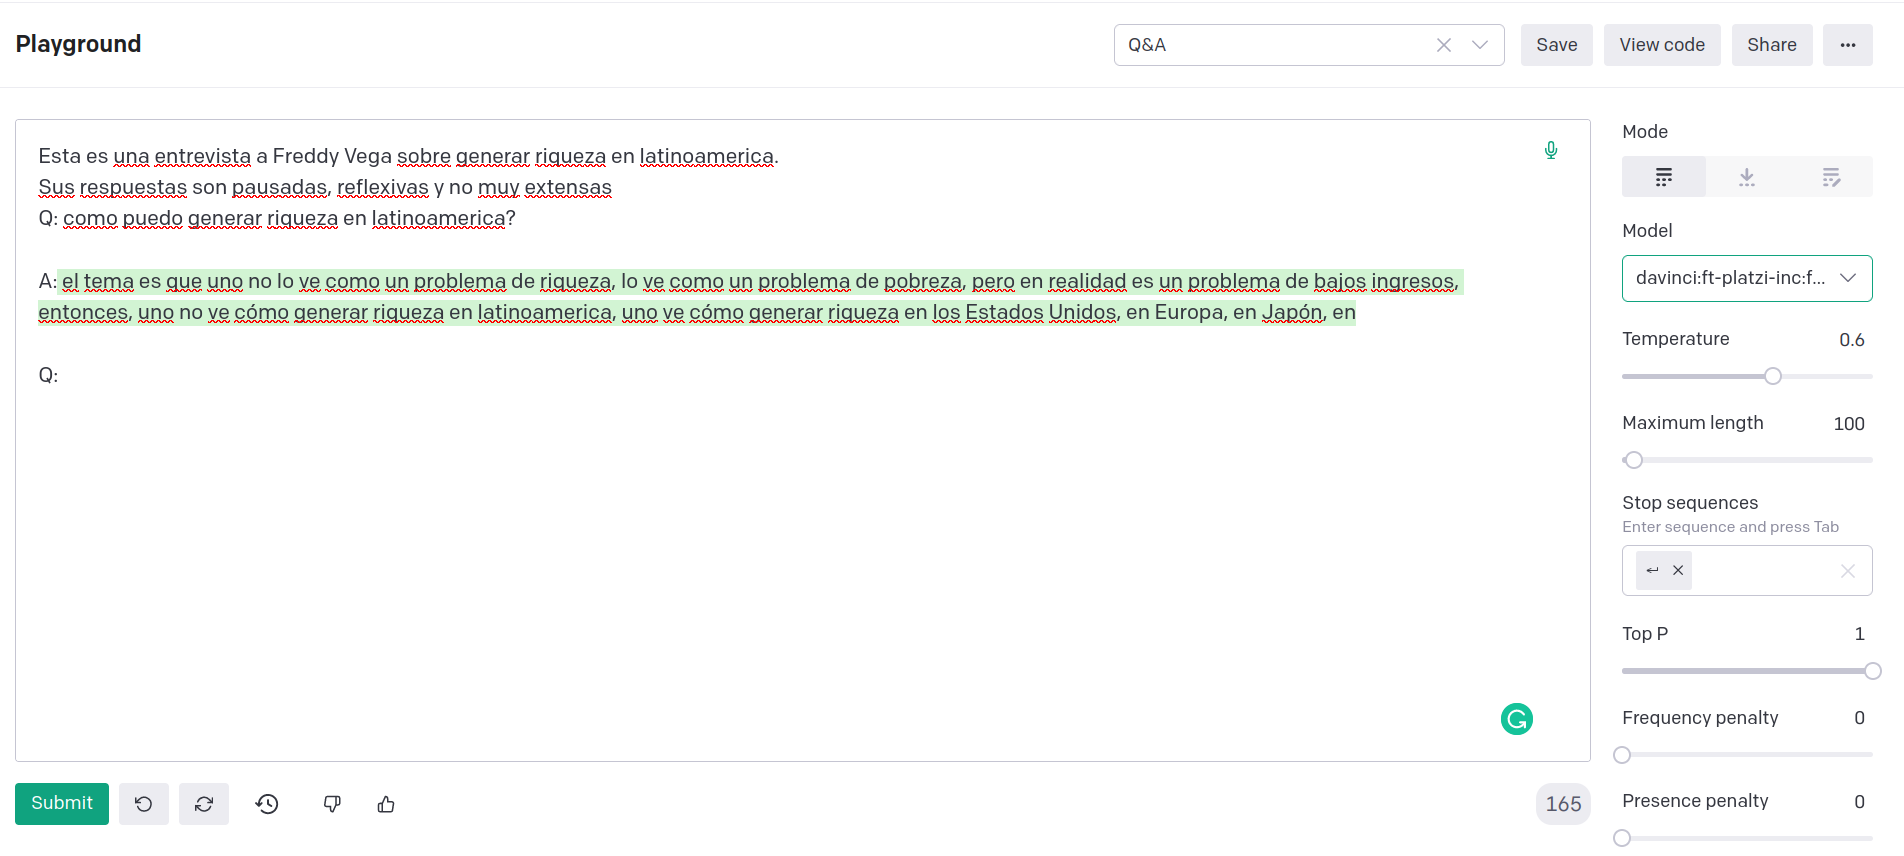